# Statistical learning

Machine learning is a technique with a growing importance, as the size of the datasets experimental sciences are facing is rapidly growing. Problems it tackles range from **building a prediction function** linking different observations, to **classifying observations**, or **learning the structure in an unlabeled dataset**.

This tutorial will explore *statistical learning*, the use of machine learning techniques with the *goal of statistical inference*: drawing conclusions on the data at hand.

Scikit-learn is a Python module integrating classic machine learning algorithms in the tightly-knit world of scientific Python packages (NumPy, SciPy, matplotlib).

## Statistical learning: the setting and the estimator object in scikit-learn

### Datasets
Scikit deals with data that is represented in 2D arrays. They can be understood as a list of multi-dimensional observations. 

The first axis is a sample axis, the second the features axis.

In [102]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [103]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

son 150 observaciones of irises, each described by 4 features: sepal len, sepal width, petal length and petal width. There are 3 classes, 50 in each class.

#### Reshaping


In [104]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

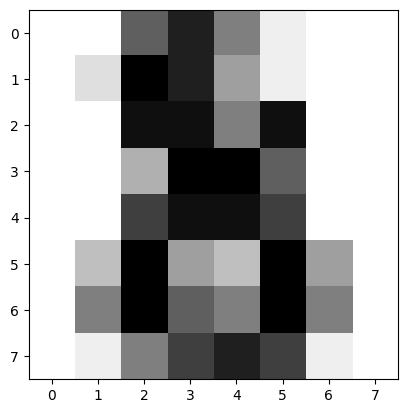

In [105]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

To use this dataset with scikit-learn, we transform each 8x8 image into a feature vector of length 64

In [106]:
data = digits.images.reshape((digits.images.shape[0], -1))
data.shape

(1797, 64)

### Estimator objects
Fitting data: the main API implemented by scikit-learn is that of the estimator. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

All estimator objects expose a fit method that takes a dataset (usually a 2-d array):

>>> estimator.fit(data)

Estimator parameters: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

>>> estimator = Estimator(param1=1, param2=2)
>>> estimator.param1

1
Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

>>> estimator.estimated_param_

## Aprendizaje supervisado: predecir una variable de observaciones de alta dimensión

El aprendizaje supervisado consiste en ligar dos datasets: una matriz de observaciones X y una variable externa y, que se busca predecir. 

La clasificación asigna observaciones en un conjunto de etiquetas finitas.

Regresión asigna un target continuo (numérico)

## Clasificación

### Nearest neighbor

Clasifica 3 tipos de irises (Setosa, Versicolour and Virginica) del tamaño (largo y ancho) de pétalo y sepal como características

In [107]:
import numpy as np
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y) # Encuentra los elementos únicos de un arreglo y los devuelve en un arreglo ordenado.


array([0, 1, 2])

#### Clasificador k-Nearest neighbors


##### Training and test set

In [108]:
np.random.seed(0) # Genera seed
indices = np.random.permutation(len(iris_X)) # Permuta los elementos
# División del dataset y las etiquetas correspondientes
# Se toman todos los elementos excepto los últimos 10 para entrenamiento.
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]


In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)


KNeighborsClassifier()

In [110]:
predict = knn.predict(iris_X_test) #Resultados de la predicción
print (predict)


[1 2 1 0 0 0 2 1 2 0]


In [111]:
iris_y_test # Resultados reales

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Regresión
en dataset de diabetes

In [112]:
import pandas as pd

In [113]:
help(datasets.load_diabetes)

Help on function load_diabetes in module sklearn.datasets._base:

load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
    Load and return the diabetes dataset (regression).

    ==============   ==================
    Samples total    442
    Dimensionality   10
    Features         real, -.2 < x < .2
    Targets          integer 25 - 346
    ==============   ==================

    .. note::
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.

    Read more in the :ref:`User Guide <diabetes_dataset>`.

    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.

        .. versionadded:

In [114]:
diabetes_desc = datasets.load_diabetes()
print (diabetes_desc.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Get data and split

In [115]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

### Applying linear regresion models

In [116]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [117]:
print (lr.coef_)

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


#### Mean Squared Error

In [118]:
np.mean((lr.predict(diabetes_X_test) - diabetes_y_test) ** 2)

2004.5186863342085

#### R^2

In [119]:
lr.score(diabetes_X_test, diabetes_y_test)

0.5850854274471953

### Shrinkage
cuando hay *pocas observaciones* por dimensión, el ruido de las observaciones inducen una alta varianza. 

Aquí se incluye una varianza normal a las observaciones, demostrando cómo si hay pocas muestras, pequeñas variaciones normales afectan el resultado de la regresión de forma importante.

In [120]:
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

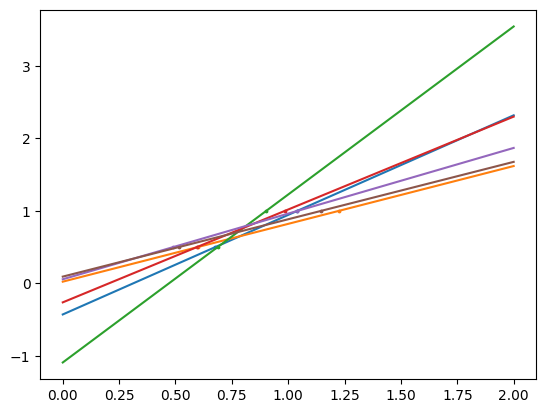

In [121]:
import matplotlib.pyplot as plt
plt.figure()
np.random.seed(0)
for _ in range (6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)


#### Regresión Ridge
Una solución es reducir los coeficientes de algunos features a valores cercanos a 0 (shrinkage, penality = l2). A esto se le llama Regresión Ridge

Mientras más alto el parámetro alpha, más alto el sesgo (regularización) y menor la varianza.

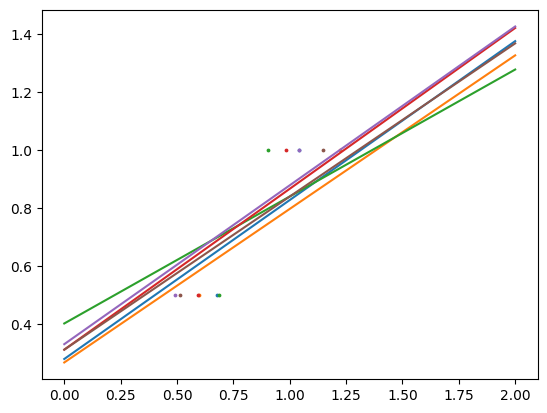

In [122]:
ridge = linear_model.Ridge(alpha=.1)

plt.figure()
np.random.seed(0)
for _ in range (6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    ridge.fit(this_X, y)
    plt.plot(test, ridge.predict(test))
    plt.scatter(this_X, y, s=3)

Ocupando el dataset de diabetes:


In [123]:
alphas = np.logspace(-4, -1, 6) #asigna valores de alpha en 6 puntos equidistantes entre 10^-4 y 10^-1. 10^-4, 10^-3.4, 10^-2.8, 10^-2.2, 10^-1.6, 10^-1
print([ridge.set_params(alpha=alpha) # Imprime el resultado de la regresión Ridge ajustado con los valores de alpha
       .fit(diabetes_X_train, diabetes_y_train)
       .score(diabetes_X_test, diabetes_y_test) 
       for alpha in alphas])

[0.5851211547549658, 0.5852172781570943, 0.5854773661274459, 0.5855599854998631, 0.583079520872396, 0.570597062803738]


#### Regresión Lasso
La regresión Lasso genera (sparcity), que implica reducir features poco relevates a 0. Genera un modelo más simple.

In [124]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
               .fit(diabetes_X_train, diabetes_y_train)
               .score(diabetes_X_test, diabetes_y_test)
           for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794)

Los coeficientes pueden llegar a ser "0" en la regresión Lasso. A esto se le llama Sparsity (penalty = "l1")


In [125]:
print(regr.coef_)

[   0.         -212.4341158   517.20105983  313.77231942 -160.82780155
   -0.         -187.19532359   69.38062294  508.65764425   71.8438046 ]


## Classification (logistic regression)

Las funciones sigmoides son más adecuadas para tareas de clasificación 

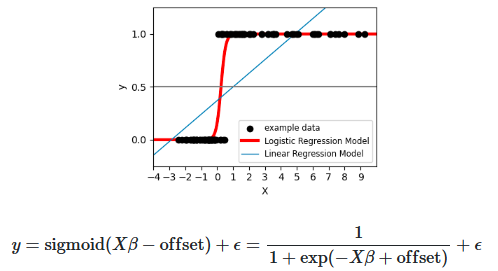

In [126]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

#### Ejercicio clasificación del digits dataset con un nearest neighbors y un modelo linear

In [127]:
from sklearn import datasets, linear_model, neighbors

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()
print(np.unique(y_digits))
print(len(X_digits))


[0 1 2 3 4 5 6 7 8 9]
1797


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Create KNeighborsClassifier object
knn = KNeighborsClassifier()
# Create LogisticRegression object
logreg = LogisticRegression()


# Fit KNeighborsClassifier with X_train
knn.fit(X_train, y_train)
# Fit LogisticRegression with X_train
logreg.fit(X_train, y_train)


LogisticRegression()

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones del modelo KNeighborsClassifier
knn_predictions = knn.predict(X_test)

# Puntuaciones para KNeighborsClassifier
print("KNeighborsClassifier Scores:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions, average='weighted'))
print("Recall:", recall_score(y_test, knn_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_predictions, average='weighted'))

# Predicciones del modelo LogisticRegression
lr_predictions = logreg.predict(X_test)

# Puntuaciones para LogisticRegression
print("\nLogisticRegression Scores:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions, average='weighted'))
print("Recall:", recall_score(y_test, lr_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, lr_predictions, average='weighted'))


KNeighborsClassifier Scores:
Accuracy: 0.9861111111111112
Precision: 0.9861869867863546
Recall: 0.9861111111111112
F1 Score: 0.9860800746632832

LogisticRegression Scores:
Accuracy: 0.9666666666666667
Precision: 0.9672774665421724
Recall: 0.9666666666666667
F1 Score: 0.9668339264990157


### SVM Iris Dataset

In [131]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)


SVC(kernel='linear')

In [134]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Get the features (X) and target (y)
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)


In [137]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a list of SVM models with different hyperparameters
svm_models = [
    SVC(kernel='linear', C=1.0),
    SVC(kernel='rbf', C=1.0),
    SVC(kernel='poly', C=1.0)
]

# Train and evaluate each SVM model
for model in svm_models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the labels for the testing set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy of the model
    print(f"Accuracy of {model.kernel} SVM: {accuracy}")


Accuracy of linear SVM: 0.9333333333333333
Accuracy of rbf SVM: 1.0
Accuracy of poly SVM: 0.9333333333333333


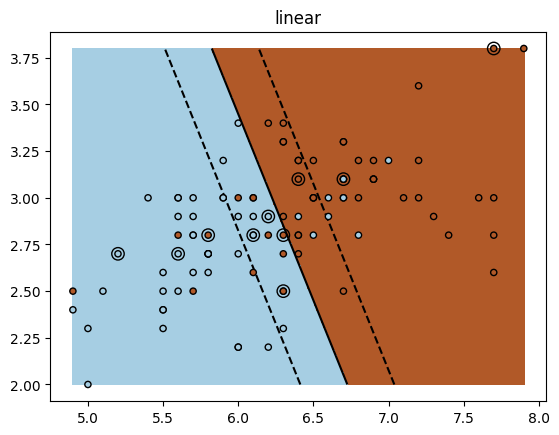

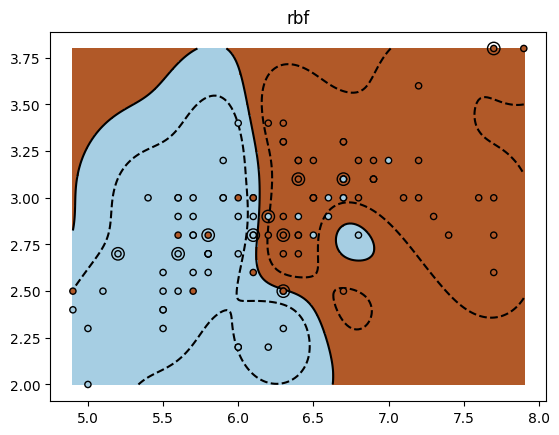

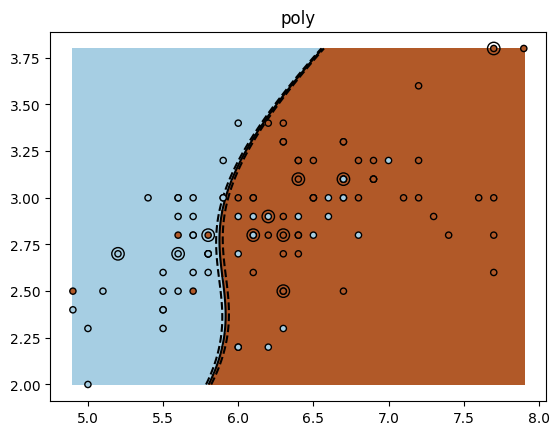

In [138]:
"""
================================
SVM Exercise
================================

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.

"""

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()
